# 머신러닝 미리보기

# 1. LDA(Latent Dirichlet Analysis)

## 1) 데이터 불러오기

In [2]:
# appreply2.csv
import pandas as pd

data = pd.read_csv("data/appreply2.csv", index_col=0)
data


,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3
...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1


## 2) 형태소 분석기

In [ ]:
# 미션1. 각 문장을 정규표현식으로 전처리한 후, 형태소 분석기를 돌려서 문장별로 담기 (stopwords 사용X)
# 미션2. 미션1에서 작성한 반복문에서 문장별로 담을 때 문장을 " ".join()으로 바꿔서 담기
    # ex. 문장1의 형태소분석기 결과가 ["오늘", "너무", "덥다"]일 때 "오늘 너무 덥다"로 append

In [ ]:
from konlpy.tag import Okt
import re

okt = Okt()
review_list = []

for i, review in enumerate(data["text"].tolist()) :
    # step1. 정규표현식으로 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # step2. 형태소 분석기
    result = okt.morphs(new_review)
    # step3. 담기
    print(f"{i}번째 리뷰 : {' '.join(result)}")
    review_list.append(' '.join(result))


0번째 리뷰 : 배달 의 민족 주문 시 리뷰 를 자주 참고 하는 편입 니 다 한가지 건의 사항 이 있다면 최신 순 별 점순 뿐 만 아니라 제 가 주문 하고 자하 는 메뉴 를 특정해서 그 메뉴 의 리뷰 만 확인 할 수 있는 기능 이 있으면 좋을 것 같습니다 메뉴 검색 기능 처럼 리뷰 에서도 특정 메뉴 검색 기능 이 필요합니다 주문 수가 많지 않은 메뉴 의 리뷰 를 보기 위해 서 드 래그 하느라 시간 이 많이 소요 되는 비 효율 이 발생 합니다 긍정 적 으로 검토 해 주심 좋을 것 같습니다
1번째 리뷰 : 내 가 주문 했던 과거 목록 에서도 검색 기능 이 있었으면 좋겠어요 분명 이 가게 에 시킨 기억 은 있는데 뭘 시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기 가 너무 어렵네요 먹던 메뉴 도 검색 가능했으면 좋겠어요 예 를 들면 곱창 을 치면 과거 에 시킨 곱창 목록 이 뜨거나 혹은 가게 리뷰 창 에 내 리뷰 보기 가 있어도 좋을거 같아요
2번째 리뷰 : 검색 화면 에서 전체 배달 포장 탭 중 배달 탭 을 스 크롤 내리면서 볼 때 아래 로 스 크롤 하는데 자꾸만 왼쪽 오른쪽 으로 넘어가서 전체 탭 이나 포장 탭 을 보게 되는데 정말 불편합니다 검색 후 배달 탭 포장 탭 B 마트 탭 뭐 든 하나 를 선택 했으면 좌우 로 넘기는 건 안 되게 하시면 안되나요 가끔 그러는 것 도 아니고 스 크롤 한 번 내릴 때 마다 왼쪽 으로 넘어가서 전체 탭 에 가게 되니까 너무 불편하고 답답해서 씁니다
3번째 리뷰 : 배달 팁 낮은 순 으로 정렬 하면 04000원 이런 식 으로 된 가게 가 가장 위로 올라옵니다 그리고 지역 에 따라 추가 배달 료 가 있다고 별도 로 체크 하게 되어있어서 결국 배달 팁 은 5000원 이 넘습니다 10만원 이상 시키면 배달 팁 0원 이라는데 장난 하는 것 도 아니고 결국 하나 하나 눌러가면서 가격 대별 금액 을 체크 하고 배달 팁 별도 로 받는지도 확인 해야 합니다
4번째 리뷰 : 최근 업데이트 가 안드로이드 5 사양 정도 에서는 안되는것 같습니다 배민 

## 3) CountVectorizer

In [20]:
# CountVectorizer 복습
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다"
]
# dictionary {'기분이': 0, '나는': 1, '나쁘다': 2, '날씨가': 3, '오늘': 4, '좋다': 5}
# 문장 1 [1 1 0 0 1 1]
# 문장 2 []
# 문장 3 []

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_df = 0.1,               # 전체 단어 등장 비율이 p 이상인 것만 사용할 것
    min_df = 2,                 # 단어가 적어도 n개 이상인 것만 사용할 것
    max_features = 1000,        # 상위 항목 n개만 사용할 것
    ngram_range = (1,2)        # 단어의 조합
)

In [ ]:
# n-gram이란?
# 나는 오늘 밥을 먹었다
# 나는 오늘 / 오늘 밥을 / 밥을 먹었다 2-gram

In [10]:
feature_vec = vectorizer.fit_transform(review_list)
feature_vec.shape

(1000, 1000)

In [11]:
freature_names = vectorizer.get_feature_names_out()
print(freature_names)

['0원' '10' '1000원' '10분' '1분' '1시간' '20분' '2만원' '3000원' '30분' '31일' '40분'
 'ui' 'vip' '가게 검색' '가게 메뉴' '가게 목록' '가게 배달' '가게 에서' '가격' '가기' '가까운' '가끔'
 '가능' '가능하게' '가능한' '가서' '가요' '가입' '가장' '가지' '갈수록' '감사합니다' '갑자기' '강제' '같고'
 '같네요' '같습니다' '같아' '같아서' '같아요' '같은' '같은 경우' '같은거' '같은데' '같이' '개발' '개발자'
 '개인' '개편' '갤럭시' '거기' '거나' '거리' '거의' '건가' '건의' '건의 사항' '건지' '걸리고' '검색 기능'
 '겁니다' '결과' '결국' '결재' '결제 수단' '경우' '경험' '계속' '계정' '고객' '고객 센터' '고려' '고민'
 '고쳐주세요' '공지' '과정' '관련' '관리' '광고' '굉장히' '구매' '구분' '구성' '굳이' '그거' '그걸' '그것'
 '그게' '그냥' '그대로' '그래도' '그래서' '그런' '그런데' '그럴' '그럼' '그렇게' '그리고' '근데' '근처'
 '글자' '금액' '기간' '기기' '기능 있었으면' '기능 있으면' '기능 추가' '기본' '기본 으로' '기분' '기사'
 '기억' '기업' '기요' '기존' '기준' '까요' '까지' '깔고' '께서' '나서' '나오고' '나오는' '나중' '남깁니다'
 '낮은' '낮은 으로' '내고' '내려서' '내용' '너무 불편합니다' '너무 불편해요' '넘게' '네이버' '네이버 로그인'
 '네트워크' '노력' '노출' '누가' '누락' '누르고' '누르면' '눌러도' '눌러서' '느낌' '는걸' '늦게' '니까'
 '다르게' '다른 배달' '다른 어플' '다른 으로' '다만' '다시 설치' '다양한' '다운' '다운로드' '다음' '단계'
 '달라' '답변' '당연히' '대기' '대로' '대부분' '대체' '대한' '대한 리뷰' 

## 4) LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5) # n_components=5 : 5개의 그룹으로 나눔
lda.fit(feature_vec)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [13]:
print(lda.components_.shape)
print(lda.components_)

(5, 1000)
[[22.1983138   0.20052289  4.3610323  ...  0.25114024  4.26140422
   0.20226961]
 [ 0.20024544  5.64525804  7.03597712 ...  0.20216455  5.72300829
  13.45136312]
 [ 0.20058147  7.75357721  0.20130598 ...  1.19917961  0.20308655
   9.94567379]
 [ 0.2000013   0.20063898  0.2015998  ...  6.08612005  0.28464821
   0.20053431]
 [ 0.20085799  0.20000289  0.2000848  ...  1.26139555  3.52785274
   0.20015917]]


In [14]:
import numpy as np
test = np.array([4, 3, 5, 2, 1])
test.argsort()

array([4, 3, 1, 0, 2])

In [16]:
# argsort 예제
import numpy as np
test = np.array([30, 10, 20])
print(test.argsort())

[1 2 0]


In [15]:
for idx, topic in enumerate(lda.components_) :
    print(f"# Topic {idx+1}:")
    topic_word_idx = topic.argsort()[::-1]
    top_idxs = topic_word_idx[:20]
    topics = [freature_names[idx] for idx in top_idxs]
    print(" ".join(topics))

# Topic 1:
좋겠어요 좋겠습니다 추가 있습니다 선택 있으면 있었으면 자주 그리고 있어서 정말 많이 별로 이용 같습니다 하나 같아요 있는 기능 생각 낮은
# Topic 2:
로그인 인증 가입 등록 번호 계속 아이디 이벤트 회원 광고 카드 네이버 만나서 했는데 진짜 보기 이런 많이 본인 회원 가입
# Topic 3:
문제 고객 오류 센터 고객 센터 계속 삭제 해도 확인 알림 전화 설치 연결 문의 안되고 완료 시스템 까지 이벤트 핸드폰
# Topic 4:
취소 화면 바로 요청 사항 입력 전화 상담 주소 요청 사항 해주세요 설정 했는데 저장 해야 채팅 목록 포장 연결 지도
# Topic 5:
매장 기사 업체 확인 이용 포장 음식점 생각 금액 전화 서비스 인지 배달 민족 민족 합니다 배달 기사 고객 한번 시스템 많이


```
uv add pyLDAvis
```

In [21]:
import pyLDAvis.lda_model 

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda, feature_vec, vectorizer)
pyLDAvis.display(vis)

## 5) 문장 살펴보기

In [17]:
sentence_topic = lda.transform(feature_vec)
print(sentence_topic.shape)
print(sentence_topic)

(1000, 5)
[[0.93529312 0.0048138  0.00489865 0.00488621 0.05010822]
 [0.96490915 0.00880467 0.0087175  0.00883167 0.008737  ]
 [0.00636635 0.00629948 0.00630269 0.97467851 0.00635296]
 ...
 [0.00573545 0.12731916 0.63400378 0.1596542  0.0732874 ]
 [0.00707495 0.00704045 0.00700901 0.15566251 0.82321307]
 [0.24584963 0.73887358 0.00510684 0.00504834 0.00512161]]


In [ ]:
sent_list = []

for n in range(sentence_topic.shape[0]) :
    topic_idx = sentence_topic[n].argmax()
    topic_prob = sentence_topic[n].max()

    sent_list.append([n, topic_idx, topic_prob])
topic_per_data = pd.DataFrame(sent_list, columns=["no", "topic_no", "prob"])
topic_per_data["review"] = data["text"]
topic_per_data

,no,topic_no,prob,review
0,0,0,0.935293,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,..."
1,1,0,0.964909,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...
2,2,3,0.974679,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스..."
3,3,0,0.701147,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...
4,4,2,0.815284,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...
...,...,...,...,...
995,995,1,0.729363,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...
996,996,0,0.493976,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...
997,997,2,0.634004,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...
998,998,4,0.823213,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...


In [ ]:
# Q. 어떤 topic의 문장이 가장 많을까?
topic_per_data["topic_no"].value_counts()

topic_no
0    240
2    234
4    207
1    169
3    150
Name: count, dtype: int64

In [ ]:
# Q. topic 중에서도 확률이 높은 문장들만 5개씩 출력하기

for topic in range(topic_per_data["topic_no"].nunique()) :
    temp_data = topic_per_data.loc[topic_per_data["topic_no"] == topic, :]
    print(temp_data.sort_values(by=["prob"], ascending=False).iloc[:5, -1])
    print("=" * 100)

75     안녕하세요. 몇 년간 어플을 잘 사용하고 있는 유저입니다. 그런데 어플을 꽤 오래 ...
200    배달료순으로 정렬하는 기능이 있는데, 가게마다 배달료가 단일이 아니고 0~4,000...
805    편리하고 좋은데 추가되었으면 기능이 하나 있습니다! 리뷰 평가 기능이 있었으면 좋겠...
802    배달요금으로 장난치는 가게들좀 단속해주세요.. 낮은순에 걸릴려고 0원~3000원 써...
419    B마트 광고에서 자주 나오는 '금방 배달왔다'식 의 문구는 일정부분 허위사실임. 정...
Name: review, dtype: object
465    로그인이 안됩니다 이번에 휴대폰 기기를 변경해서 다 초기화 되는 바람에 다시 로그인...
333    안녕하세요 배달의 민족 앱 사용자입니다 잘사용하고 있는데 오늘 사용할일이 있어서 앱...
603    배달팁이 기본 4000원이 넘어갑니다 장난하나요? 7000원인 곳도 있어요 물가 올...
98     비회원으로 사용하다가 가입할까해서 네이버 아이디로 로그인시도를 했는데 팝업이 순식간...
127    km거리로 볼수있는 버튼이 사라지고 나서 시골이라 그런지 뜨는게 정말 없었어요. 주...
Name: review, dtype: object
480    아니 지금 계속 네트워크 연결이 불안정 하다고 메시지 뜨면서 아무것도 안돼서 음식 ...
250    결제 버튼을 눌렀는데 주문 완료 화면이 뜨지 않고, 결제 전화면(주문 화면)이 뜨길...
748    첫구매쿠폰 홍보에 이끌려 처음 사용해보았는데, 쿠폰이 자동발급이 아니라 내가 찾아서...
452    B마트 아무리 한번에 한집 배달이 아니라지만 배달 예상시간 10분전에 위치 확인해보...
269    왜 사용자가 배달원이 배달실수 한 것에대한것을 배달이 잘못간거에 대해서 증명해야하도...
Name: review, dtype: object
218    고객문의 시 고객은 30분 넘게 상담원이 응답할 때까지 기다려야하지만 상담원은 6분...
210 

# 2. 분류 학습

## 1) 데이터 불러오기

In [26]:
import pandas as pd

data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [28]:
# score를 기반으로 긍정/부정을 나누고 싶다
import numpy as np

data["reaction"] = np.where(data["score"] >= 4, 1, 0)
data.head()

,text,score,reaction
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,0


In [33]:
data["length"] = data["text"].str.len()
data.head()

,text,score,reaction,length
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1,227
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1,175
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0,229
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0,196
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,0,250


c:\python_workspace\.venv\lib\site-packages\koreanize_matplotlib\koreanize_matplotlib.py:16: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  is_support_createFontList = LooseVersion(matplotlib.__version__) < '3.2'
c:\python_workspace\.venv\lib\site-packages\setuptools\_distutils\version.py:336: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


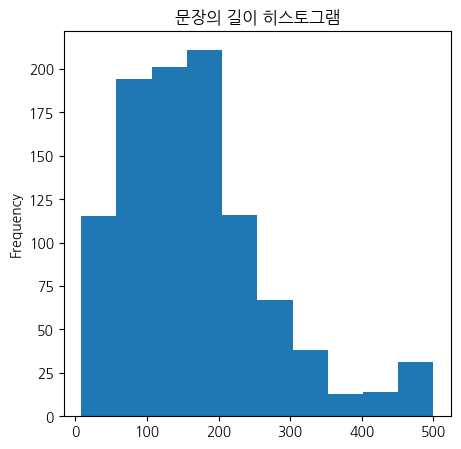

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(5,5))
data["length"].plot(kind="hist")
plt.title("문장의 길이 히스토그램")
plt.show()

# 문장의 길이가 지나치게 긴것은 이상치처리 (다들 200자 내외로 적는데, 한사람만 만자를 적는다면, 한사람으로 인해 데이터가...)

## 2) 데이터 전처리

In [31]:
from konlpy.tag import Okt
import re

okt = Okt()
clean_reviews = []

for i, review in enumerate(data["text"]) :
    # step1. 정규표현식으로 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # step2. 형태소 분석기
    result = okt.morphs(new_review)
    # step3. 담기
    print(f"{i}번째 리뷰 : {' '.join(result)}")
    clean_reviews.append(' '.join(result))

print(clean_reviews)

<>:9: DeprecationWarning: invalid escape sequence '\s'
<>:9: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_39456\4037091529.py:9: DeprecationWarning: invalid escape sequence '\s'
  new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)


0번째 리뷰 : 배달 의 민족 주문 시 리뷰 를 자주 참고 하는 편입 니 다 한가지 건의 사항 이 있다면 최신 순 별 점순 뿐 만 아니라 제 가 주문 하고 자하 는 메뉴 를 특정해서 그 메뉴 의 리뷰 만 확인 할 수 있는 기능 이 있으면 좋을 것 같습니다 메뉴 검색 기능 처럼 리뷰 에서도 특정 메뉴 검색 기능 이 필요합니다 주문 수가 많지 않은 메뉴 의 리뷰 를 보기 위해 서 드 래그 하느라 시간 이 많이 소요 되는 비 효율 이 발생 합니다 긍정 적 으로 검토 해 주심 좋을 것 같습니다
1번째 리뷰 : 내 가 주문 했던 과거 목록 에서도 검색 기능 이 있었으면 좋겠어요 분명 이 가게 에 시킨 기억 은 있는데 뭘 시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기 가 너무 어렵네요 먹던 메뉴 도 검색 가능했으면 좋겠어요 예 를 들면 곱창 을 치면 과거 에 시킨 곱창 목록 이 뜨거나 혹은 가게 리뷰 창 에 내 리뷰 보기 가 있어도 좋을거 같아요
2번째 리뷰 : 검색 화면 에서 전체 배달 포장 탭 중 배달 탭 을 스 크롤 내리면서 볼 때 아래 로 스 크롤 하는데 자꾸만 왼쪽 오른쪽 으로 넘어가서 전체 탭 이나 포장 탭 을 보게 되는데 정말 불편합니다 검색 후 배달 탭 포장 탭 B 마트 탭 뭐 든 하나 를 선택 했으면 좌우 로 넘기는 건 안 되게 하시면 안되나요 가끔 그러는 것 도 아니고 스 크롤 한 번 내릴 때 마다 왼쪽 으로 넘어가서 전체 탭 에 가게 되니까 너무 불편하고 답답해서 씁니다
3번째 리뷰 : 배달 팁 낮은 순 으로 정렬 하면 04000원 이런 식 으로 된 가게 가 가장 위로 올라옵니다 그리고 지역 에 따라 추가 배달 료 가 있다고 별도 로 체크 하게 되어있어서 결국 배달 팁 은 5000원 이 넘습니다 10만원 이상 시키면 배달 팁 0원 이라는데 장난 하는 것 도 아니고 결국 하나 하나 눌러가면서 가격 대별 금액 을 체크 하고 배달 팁 별도 로 받는지도 확인 해야 합니다
4번째 리뷰 : 최근 업데이트 가 안드로이드 5 사양 정도 에서는 안되는것 같습니다 배민 

## 3) TFIDFVectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_vec = vectorizer.fit_transform(clean_reviews)
print(vectorizer.vocabulary_)
print(tfidf_vec.toarray())


{'배달': 3499, '민족': 3264, '주문': 6867, '리뷰': 2663, '자주': 6418, '참고': 7167, '하는': 7808, '편입': 7611, '한가지': 7976, '건의': 545, '사항': 4166, '있다면': 6319, '최신': 7321, '점순': 6653, '아니라': 4871, '하고': 7760, '자하': 6423, '메뉴': 3072, '특정해서': 7542, '확인': 8376, '있는': 6294, '기능': 968, '있으면': 6366, '좋을': 6824, '같습니다': 454, '검색': 587, '처럼': 7265, '에서도': 5517, '특정': 7541, '필요합니다': 7740, '수가': 4367, '많지': 2865, '않은': 5130, '보기': 3620, '위해': 5897, '래그': 2623, '하느라': 7807, '시간': 4465, '많이': 2864, '소요': 4338, '되는': 2126, '효율': 8409, '발생': 3465, '합니다': 8072, '긍정': 961, '으로': 5925, '검토': 594, '주심': 6889, '했던': 8275, '과거': 744, '목록': 3152, '있었으면': 6358, '좋겠어요': 6783, '분명': 3845, '가게': 220, '시킨': 4547, '기억': 1017, '있는데': 6306, '시켰고': 4504, '맛있게': 2897, '먹은게': 3033, '맞는지': 2932, '알고싶은데': 5156, '찾기': 7186, '너무': 1441, '어렵네요': 5301, '먹던': 3004, '가능했으면': 292, '들면': 2358, '곱창': 728, '치면': 7371, '뜨거나': 2553, '혹은': 8350, '있어도': 6333, '좋을거': 6825, '같아요': 459, '화면': 8367, '에서': 5515, '전체': 6614, '포장': 7667, '크롤': 7458, '내리

## 4) 학습 데이터 준비

In [ ]:
# Train, Test 데이터셋 나누기
from sklearn.model_selection import train_test_split

X = tfidf_vec
y = data["reaction"]

# random_state 지정해두면, 나중에 다시 실행할때 똑같은 값을 가져올 수 있음 (똑같은 학습값..?)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 8456) (200, 8456) (800,) (200,)


## 5) 데이터 학습

In [37]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
y_pred = lr_model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


## 6) 성능평가

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
print(f"Precision : {precision_score(y_test, y_pred)}")
print(f"Recall : {recall_score(y_test, y_pred)}")
print(f"F1-Score : {f1_score(y_test, y_pred)}")

Accuracy : 0.755
Precision : 0.9166666666666666
Recall : 0.1864406779661017
F1-Score : 0.30985915492957744


## 7) 예측

In [41]:
import re 

new_review = "토종 순대국밥 집보다 맛있고 퀄리티가 높음, 안에 고기가 잡내 없이 고소함,  셀프바 음료수 무료"

# Step1. 전처리 
review = re.sub("[^a-zA-Z0-9가-힣\s]", "", new_review)
# Step2. 형태소 분석
result = okt.morphs(review)
# Step3. 문장으로 합치기 
clean_review = ' '.join(result)
print(clean_review)

토종 순대 국밥 집 보다 맛있고 퀄리티 가 높음 안 에 고기 가 잡내 없이 고소함 셀프 바 음료수 무료


<>:6: DeprecationWarning: invalid escape sequence '\s'
<>:6: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_39456\4223610282.py:6: DeprecationWarning: invalid escape sequence '\s'
  review = re.sub("[^a-zA-Z0-9가-힣\s]", "", new_review)


In [43]:
X_new = vectorizer.transform([clean_review])
print(X_new.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [44]:
pred_new = lr_model.predict(X_new)
print(pred_new)

[0]
